<a href="https://colab.research.google.com/github/jhk0530/dinosaur/blob/master/66_%EC%9A%94%EB%A6%AC_%EC%82%AC%EC%A7%84%EC%9D%84_%EA%B8%B0%EB%B0%98%EC%9C%BC%EB%A1%9C_%EC%B9%BC%EB%A1%9C%EB%A6%AC%EB%A5%BC_%EC%95%8C%EB%A0%A4%EC%A3%BC%EB%8A%94_%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%A8_%EB%A7%8C%EB%93%A4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 머신러닝을 할 때 가장 어려운 것은 데이터 수집

- **초밥**, **샐러드**, **마파두부** 라는 3 종류 요리를 학습 시키고 칼로리를 출력하는 프로그램
- 메뉴별 최소 100장 이상씩 필요 
- 알바 써서 찍던가 인터넷에서 긁어와야함

`flickr` 사용

flickr 계정 만드는게 젤 귀찮다. 비밀번호 12자리를 어떻게 한다냐

+ 123456789012




In [1]:
!pip install flickrapi



     |████████████████████████████████| 61kB 3.8MB/s 


In [0]:
savedir = './image'
os.mkdir(savedir)

In [7]:
from flickrapi import FlickrAPI
from urllib.request import urlretrieve
from pprint import pprint

import os, time, sys

key = ''
secret = ''

wait_time = 1

## ./image 는 만들어졌다고 가정

def go_download(keyword, dir):
  savedir = './image/' + dir
  if not os.path.exists(savedir):
    os.mkdir(savedir)

  flickr = FlickrAPI(key, secret, format = 'parsed-json')

  res = flickr.photos.search(
      text = keyword,
      per_page = 300,
      memdia = 'photos',
      sort = 'relevance',
      safe_search = 1,
      extras = 'url_q, license'
  )

  photos = res['photos']
  pprint(photos)

  try:
    for i , photo in enumerate(photos['photo']):
      url_q = photo['url_q']
      filepath = savedir + '/' + photo['id'] + '.jpg'
      if os.path.exists(filepath) : continue
      print(str(i+1)+':download=', url_q)
      urlretrieve(url_q, filepath)
      time.sleep(wait_time)
  except:
    import tarceback
    traceback.print_exc()

go_download('초밥', 'sushi')
go_download('샐러드', 'salad')
go_download('마파두부', 'tofu')



스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
            'id': '7926364676',
            'isfamily': 0,
            'isfriend': 0,
            'ispublic': 1,
            'license': '0',
            'owner': '84578432@N06',
            'secret': 'f2cf8ef367',
            'server': '8450',
            'title': '샐러드',
            'url_q': 'https://live.staticflickr.com/8450/7926364676_f2cf8ef367_q.jpg',
            'width_q': 150},
           {'farm': 9,
            'height_q': 150,
            'id': '7926365042',
            'isfamily': 0,
            'isfriend': 0,
            'ispublic': 1,
            'license': '0',
            'owner': '84578432@N06',
            'secret': 'cf82757876',
            'server': '8306',
            'title': '샐러드',
            'url_q': 'https://live.staticflickr.com/8306/7926365042_cf82757876_q.jpg',
            'width_q': 150},
           {'farm': 9,
            'height_q': 150,
            'id': '8550854832',
            'isfamily': 0,
            'isfriend': 0

In [8]:

# 로컬로 다운로드를 위한 image directory 압축 
!zip -r /content/file.zip /content/image

# https://stackoverflow.com/questions/50453428/how-do-i-download-multiple-files-or-an-entire-folder-from-google-colab 참조


  adding: content/image/ (stored 0%)
  adding: content/image/tofu/ (stored 0%)
  adding: content/image/tofu/5163279609.jpg (deflated 1%)
  adding: content/image/tofu/29236960513.jpg (deflated 0%)
  adding: content/image/tofu/18805703523.jpg (deflated 0%)
  adding: content/image/tofu/26611937485.jpg (deflated 0%)
  adding: content/image/tofu/10357474743.jpg (deflated 4%)
  adding: content/image/tofu/12320027855.jpg (deflated 0%)
  adding: content/image/tofu/14589562703.jpg (deflated 0%)
  adding: content/image/tofu/21899598958.jpg (deflated 0%)
  adding: content/image/tofu/14220985594.jpg (deflated 1%)
  adding: content/image/tofu/49704580633.jpg (deflated 1%)
  adding: content/image/tofu/14204355183.jpg (deflated 0%)
  adding: content/image/tofu/12811945585.jpg (deflated 0%)
  adding: content/image/tofu/4513691974.jpg (deflated 1%)
  adding: content/image/tofu/4215509483.jpg (deflated 1%)
  adding: content/image/tofu/4646600022.jpg (deflated 1%)
  adding: content/image/tofu/4172797617.

클리닝 작업후 이미지 100개씩만 선택하라고 했는데 그냥 되는데로 다 뽑음

마파두부가 300개가 안뽑힘.
샐러드 : 232개 / 300개
초밥 : 259개 / 300개
마파두부 : 66개 / 78개 

각 이미지 압축 파일 깃헙에 올려둠




In [0]:
# 디렉토리 삭제
# https://stackoverflow.com/questions/52265978/how-to-delete-a-locally-uploaded-file-on-google-colab 참조
!rm -rf ./image/salad
!rm -rf ./image/sushi
!rm -rf ./image/tofu

## 이미지 저장

In [17]:
import numpy as np
from PIL import Image
import os, glob, random

outfile = 'image/photos.npz'

max_photo = 260 # 원래 100
photo_size = 32
x = [] # data
y = [] # label


def glob_files(path,label) : 
  files = glob.glob(path + '/*.jpg')
  random.shuffle(files)

  num  = 0
  for f in files :
    if num >= max_photo  : break
    num +=1
    img = Image.open(f)
    img = img.convert("RGB")
    img = img.resize((photo_size, photo_size))
    img = np.asarray(img)
    x.append(img)
    y.append(label)



glob_files('./image/sushi',0)
glob_files('./image/salad',1)
glob_files('./image/tofu',2)

np.savez(outfile,x = x, y = y)
print('저장했습니다. :', outfile, len(x))


저장했습니다. : image/photos.npz 557


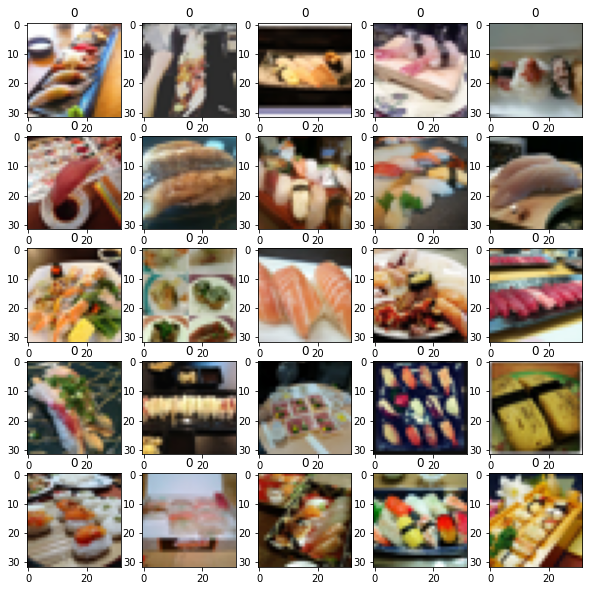

In [18]:
import matplotlib.pyplot as plt

photos = np.load('image/photos.npz')
x = photos['x']
y = photos['y']

idx = 0
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.title(y[i+idx])
  plt.imshow(x[i+idx])
plt.show()

## CNN으로 학습 시키기



Train on 445 samples, validate on 112 samples
Epoch 1/20
445/445 [==============================] - 2s 4ms/step - loss: 1.0849 - accuracy: 0.4247 - val_loss: 0.9877 - val_accuracy: 0.5268
Epoch 2/20
445/445 [==============================] - 2s 4ms/step - loss: 0.9713 - accuracy: 0.5011 - val_loss: 1.0122 - val_accuracy: 0.4018
Epoch 3/20
445/445 [==============================] - 2s 4ms/step - loss: 0.9684 - accuracy: 0.4292 - val_loss: 0.9829 - val_accuracy: 0.4554
Epoch 4/20
445/445 [==============================] - 2s 4ms/step - loss: 0.9614 - accuracy: 0.4899 - val_loss: 1.0308 - val_accuracy: 0.5357
Epoch 5/20
445/445 [==============================] - 2s 4ms/step - loss: 0.9600 - accuracy: 0.5326 - val_loss: 0.9626 - val_accuracy: 0.5089
Epoch 6/20
445/445 [==============================] - 2s 4ms/step - loss: 0.9867 - accuracy: 0.5258 - val_loss: 0.9588 - val_accuracy: 0.5446
Epoch 7/20
445/445 [==============================] - 2s 4ms/step - loss: 0.8988 - accuracy: 0.5663 - 

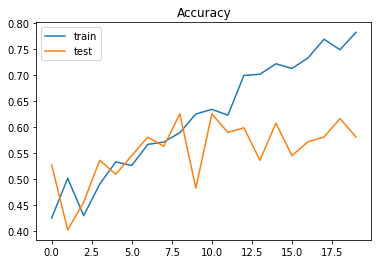

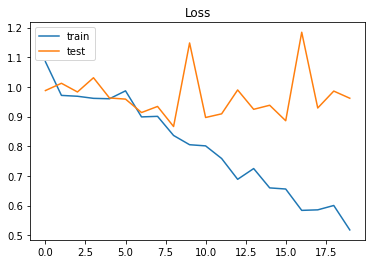

In [23]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop

def def_model(in_shape, nb_classes):
  model = Sequential()
  model.add(
      Conv2D(32, 
             kernel_size = (3,3), 
             activation = 'relu', 
             input_shape = in_shape 
             )
      )
  model.add(Conv2D(32,(3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(64,(3,3), activation = 'relu'))
  model.add(Conv2D(64,(3,3), activation = 'relu'))
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(512, activation ='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(nb_classes, activation='softmax'))
  return model

def get_model(in_shape, nb_classes):
  model = def_model(in_shape, nb_classes)
  model.compile(loss = 'categorical_crossentropy', optimizer = RMSprop(), metrics = ['accuracy'])
  return model

import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split

im_rows = 32
im_cols = 32
im_color = 3
in_shape = (im_rows, im_cols, im_color)
nb_classes = 3


photos = np.load("image/photos.npz")
x = photos['x']
y = photos['y']

x = x.reshape(-1, im_rows, im_cols, im_color)
x = x.astype('float32')/255

y = keras.utils.np_utils.to_categorical(y.astype('int32'), nb_classes)

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.8)

model = get_model(in_shape, nb_classes)

hist = model.fit(x_train, y_train, batch_size = 32, epochs = 20, verbose  =1, validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test, verbose = 1)
print('정답률 =', score[1], '손실률 = ', score[0])

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

plt.title('Accuracy')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

model.save_weights('./image/photos-model-light.hdf5')

정답률 58% 너무 낮다. 하지만 만들어서 돌렸다는것에 의미를 두자

## 직접 찍은 사진으로 테스트 하기 

칼로리 테이블

|요리|칼로리(Kcal)|
|:-:|:-:|
|초밥|588|
|샐러드|118|
|마파두부|648|



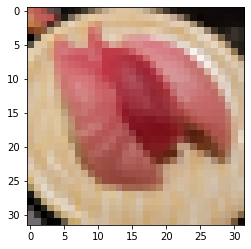

이 사진은 초밥 로 칼로리는  588 kCal입니다.
가능성은  94 %입니다


In [31]:
import keras
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

target_image = '/test-sushi.jpg'

im_rows = 32
im_cols= 32
im_color = 3

in_shape = (im_rows, im_cols, im_color)
nb_classes = 3

LABELS = ["초밥", "샐러드", "마파두부"]
CALORIES = [588, 118, 648]


def check_photo(path):
  img = Image.open(path)
  img = img.convert("RGB")
  img = img.resize((im_cols, im_rows))
  plt.imshow(img)
  plt.show()

  x = np.asarray(img)
  x = x.reshape(-1, im_rows, im_cols, im_color)
  x = x.astype('float32')/255

  pre = model.predict([x])[0]
  idx = pre.argmax()
  per = int(pre[idx]*100)
  return(idx, per)

def check_photo_str(path):
  idx,per = check_photo(path)
  print('이 사진은', LABELS[idx], "로 칼로리는 ", CALORIES[idx], "kCal입니다.")
  print('가능성은 ', per ,'%입니다')



model = get_model(in_shape, nb_classes)
model.load_weights('./image/photos-model-light.hdf5')

check_photo_str(target_image)

오타 왤케 많어 마지막 장에